## Data Preparation Exercises

The end result of this exercise should be a file named prepare.py.

Using your store items data:
    
1. Convert date column to datetime format.

In [1]:
import pandas as pd
import requests

import matplotlib.pyplot as plt

import os
import acquire

In [2]:
df = acquire.merge_data()
df.head()

,sale_amount,sale_date,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [3]:
df.sale_date = pd.to_datetime(df.sale_date, format = '%a, %d %b %Y %H:%M:%S %Z')
df.head()

,sale_amount,sale_date,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,13.0,2013-01-01 00:00:00+00:00,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,11.0,2013-01-02 00:00:00+00:00,2,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,14.0,2013-01-03 00:00:00+00:00,3,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,13.0,2013-01-04 00:00:00+00:00,4,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,10.0,2013-01-05 00:00:00+00:00,5,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   sale_amount    913000 non-null  float64            
 1   sale_date      913000 non-null  datetime64[ns, GMT]
 2   sale_id        913000 non-null  int64              
 3   store_address  913000 non-null  object             
 4   store_city     913000 non-null  object             
 5   store_id       913000 non-null  int64              
 6   store_state    913000 non-null  object             
 7   store_zipcode  913000 non-null  int64              
 8   item_brand     913000 non-null  object             
 9   item_id        913000 non-null  int64              
 10  item_name      913000 non-null  object             
 11  item_price     913000 non-null  float64            
 12  item_upc12     913000 non-null  int64              
 13  item_upc14     913000 non-nul

2. Plot the distribution of sale_amount and item_price.

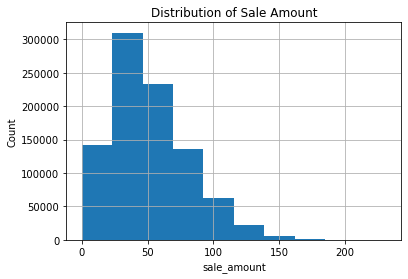

In [5]:
df.sale_amount.hist()
plt.title('Distribution of Sale Amount')
plt.xlabel('sale_amount')
plt.ylabel('Count')
plt.show()

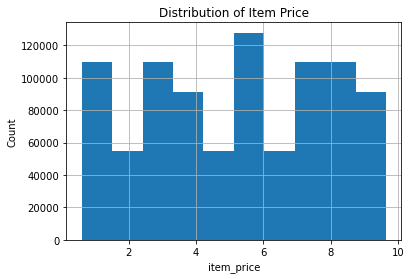

In [6]:
df.item_price.hist()
plt.title('Distribution of Item Price')
plt.xlabel('item_price')
plt.ylabel('Count')
plt.show()

array([[<AxesSubplot:title={'center':'sale_amount'}>,
        <AxesSubplot:title={'center':'item_price'}>]], dtype=object)

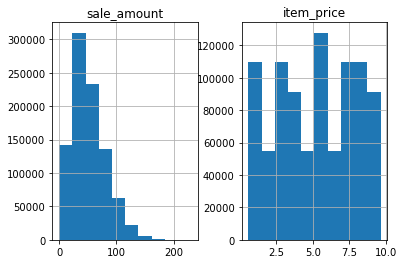

In [7]:
df[['sale_amount', 'item_price']].hist()

3. Set the index to be the datetime variable.

In [8]:
df = df.set_index('sale_date').sort_index()
df.head()

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01 00:00:00+00:00,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664
2013-01-01 00:00:00+00:00,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01 00:00:00+00:00,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211


4. Add a 'month' and 'day of week' column to your dataframe.

In [9]:
df['month'] = df.index.month_name()
df.head()

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month
sale_date,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January
2013-01-01 00:00:00+00:00,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,January
2013-01-01 00:00:00+00:00,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January
2013-01-01 00:00:00+00:00,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January


In [10]:
df['day_of_week'] = df.index.day_name()
df.head().T

sale_date,2013-01-01 00:00:00+00:00,2013-01-01 00:00:00+00:00,2013-01-01 00:00:00+00:00,2013-01-01 00:00:00+00:00,2013-01-01 00:00:00+00:00
sale_amount,13,26,27,54,35
sale_id,1,211817,832657,213643,215469
store_address,12125 Alamo Ranch Pkwy,12018 Perrin Beitel Rd,12018 Perrin Beitel Rd,15000 San Pedro Ave,735 SW Military Dr
store_city,San Antonio,San Antonio,San Antonio,San Antonio,San Antonio
store_id,1,7,7,8,9
store_state,TX,TX,TX,TX,TX
store_zipcode,78253,78217,78217,78232,78221
item_brand,Riceland,Mueller,Mama Marys,Mueller,Mueller
item_id,1,12,46,12,12
item_name,Riceland American Jazmine Rice,Mueller Sport Care Basic Support Level Medium ...,Pizza Sauce,Mueller Sport Care Basic Support Level Medium ...,Mueller Sport Care Basic Support Level Medium ...


5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [11]:
df['sales_total'] = df.sale_amount * df.item_price
df.head().T

sale_date,2013-01-01 00:00:00+00:00,2013-01-01 00:00:00+00:00,2013-01-01 00:00:00+00:00,2013-01-01 00:00:00+00:00,2013-01-01 00:00:00+00:00
sale_amount,13,26,27,54,35
sale_id,1,211817,832657,213643,215469
store_address,12125 Alamo Ranch Pkwy,12018 Perrin Beitel Rd,12018 Perrin Beitel Rd,15000 San Pedro Ave,735 SW Military Dr
store_city,San Antonio,San Antonio,San Antonio,San Antonio,San Antonio
store_id,1,7,7,8,9
store_state,TX,TX,TX,TX,TX
store_zipcode,78253,78217,78217,78232,78221
item_brand,Riceland,Mueller,Mama Marys,Mueller,Mueller
item_id,1,12,46,12,12
item_name,Riceland American Jazmine Rice,Mueller Sport Care Basic Support Level Medium ...,Pizza Sauce,Mueller Sport Care Basic Support Level Medium ...,Mueller Sport Care Basic Support Level Medium ...


6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [12]:
def store_prep(df):
    
    # convert 'sale_date' column to datetime format
    df.sale_date = pd.to_datetime(df.sale_date, format = '%a, %d %b %Y %H:%M:%S %Z')
    
    # plot the distribution of 'sale_amount' 
    df.sale_amount.hist()
    plt.title('Distribution of Sale Amount')
    plt.xlabel('sale_amount')
    plt.ylabel('Count')
    plt.show()
    
    # plot the distribution of 'item_price'
    df.item_price.hist()
    plt.title('Distribution of Item Price')
    plt.xlabel('item_price')
    plt.ylabel('Count')
    plt.show()
    
    # set the index to 'sale_date'
    df = df.set_index('sale_date').sort_index()
    
    # add a 'month' column to dataframe
    df['month'] = df.index.month
    # add a 'day_of_week' column to dataframe
    df['day_of_week'] = df.index.day_name()
    # add 'sales_total' column to dataframe ('sales_total' = 'sale_amount' * 'item_price')
    df['sales_total'] = df.sale_amount * df.item_price
    
    return df

Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

1. Convert date column to datetime format.

In [32]:
df = acquire.get_opsd_germany()
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 205.5+ KB


In [34]:
df.Date = pd.to_datetime(df.Date, format = '%Y-%m-%d')
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


2. Plot the distribution of each of your variables.

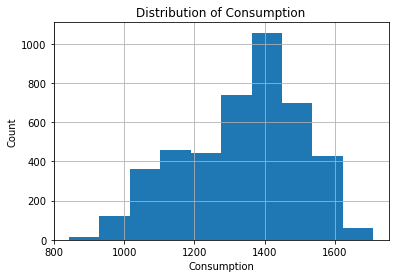

In [35]:
df.Consumption.hist()
plt.title('Distribution of Consumption')
plt.xlabel('Consumption')
plt.ylabel('Count')
plt.show()    

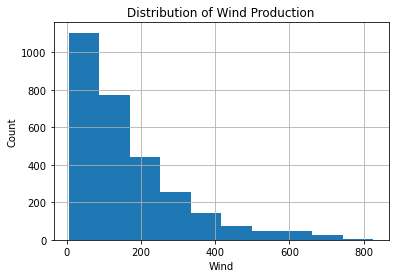

In [36]:
df.Wind.hist()
plt.title('Distribution of Wind Production')
plt.xlabel('Wind')
plt.ylabel('Count')
plt.show() 

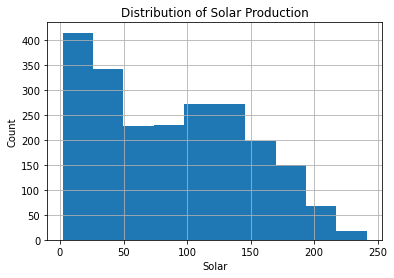

In [37]:
df.Solar.hist()
plt.title('Distribution of Solar Production')
plt.xlabel('Solar')
plt.ylabel('Count')
plt.show() 

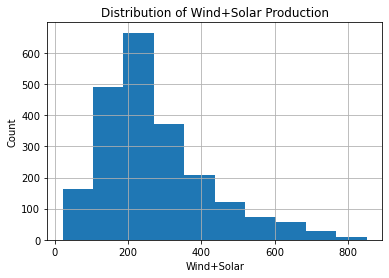

In [38]:
df['Wind+Solar'].hist()
plt.title('Distribution of Wind+Solar Production')
plt.xlabel('Wind+Solar')
plt.ylabel('Count')
plt.show() 

array([[<AxesSubplot:title={'center':'Consumption'}>,
        <AxesSubplot:title={'center':'Wind'}>],
       [<AxesSubplot:title={'center':'Solar'}>,
        <AxesSubplot:title={'center':'Wind+Solar'}>]], dtype=object)

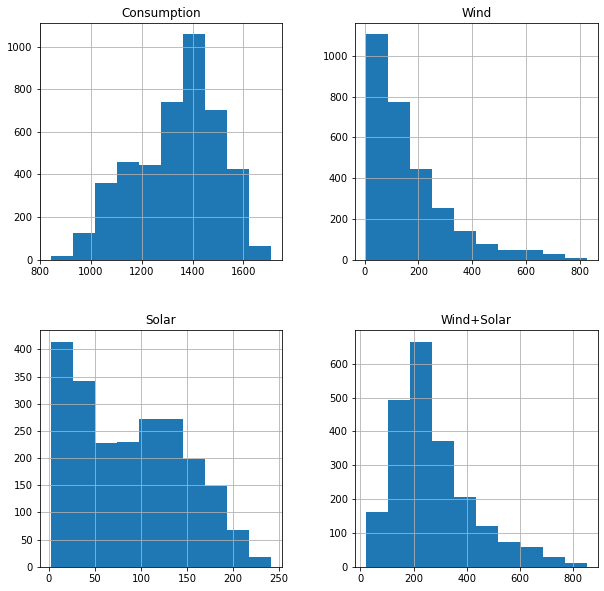

In [39]:
df.hist(figsize=(10, 10))

3. Set the index to be the datetime variable.

In [23]:
df = df.set_index('Date').sort_index()
df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


4. Add a month and a year column to your dataframe.

In [24]:
df['month'] = df.index.month_name()
df.head()

,Consumption,Wind,Solar,Wind+Solar,month
Date,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January
2006-01-02,1380.521,NaN,NaN,NaN,January
2006-01-03,1442.533,NaN,NaN,NaN,January
2006-01-04,1457.217,NaN,NaN,NaN,January
2006-01-05,1477.131,NaN,NaN,NaN,January


In [25]:
df['year'] = df.index.year
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January,2006
2006-01-02,1380.521,NaN,NaN,NaN,January,2006
2006-01-03,1442.533,NaN,NaN,NaN,January,2006
2006-01-04,1457.217,NaN,NaN,NaN,January,2006
2006-01-05,1477.131,NaN,NaN,NaN,January,2006


5. Fill any missing values.

In [26]:
df = df.fillna(value=0)
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006


In [27]:
(df['Wind+Solar'] == (df['Wind'] + df['Solar'])).value_counts()

False    2194
True     2189
dtype: int64

In [28]:
df['wind_solar_custom'] = df['Wind'] + df['Solar']

In [30]:
df[['Wind+Solar', 'wind_solar_custom', 'Wind', 'Solar']][df['Wind+Solar'] != df['wind_solar_custom']]

,Wind+Solar,wind_solar_custom,Wind,Solar
Date,,,,
2010-01-01,0.000,48.709,48.709,0.000
2010-01-02,0.000,24.628,24.628,0.000
2010-01-03,0.000,22.963,22.963,0.000
2010-01-04,0.000,59.318,59.318,0.000
2010-01-05,0.000,41.624,41.624,0.000
...,...,...,...,...
2017-12-24,822.371,822.371,812.422,9.949
2017-12-25,603.575,603.575,587.810,15.765
2017-12-26,748.376,748.376,717.453,30.923


6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [ ]:
def prepare_opsd(df):
    
    # convert 'Date' column to datetime format
    df.Date = pd.to_datetime(df.Date, format = '%Y-%m-%d')
    
    # plot the distribution of each of the variables
    df.hist(figsize=(20, 20))
    
    # set the index to 'Date'
    df = df.set_index('Date').sort_index()
    
    # add 'month' column to dataframe
    df['month'] = df.index.month_name()
    # add 'year' column to dataframe
    df['year'] = df.index.year
    
    # fill any missing values
    df = df.fillna(value=0)
    
    return df